In [15]:
import sys
sys.path.append("../../src/")

import uncertainpy.gradual as grad  

# Child custody example


### 1. Create HO-BAG

We can define
- initial weights for arguments, attacks and supports (these can be seen as apriori beliefs when ignoring related arguments). We assume that weights are between 0 (full rejection) and 1 (full acceptance),
- attackers and supporters of arguments, attacks and supports (only arguments can be the sources of attacks and supports).

In [ ]:
BAG = grad.BAG()

dec_father = grad.Argument("Father", 0.5)
dec_mother = grad.Argument("Mother", 0.5)
BAG.add_attack(dec_father, dec_mother)
BAG.add_attack(dec_mother, dec_father)

e_father_hit_son = grad.Argument("Father hit son once", 0.6)
BAG.add_attack(e_father_hit_son, dec_mother, 0.7)

e_father_refuse = grad.Argument("Children refused to live with father", 0.9)
BAG.add_attack(e_father_refuse, dec_father, 0.8)

e_mother_competence = grad.Argument("Mother better suited for raising children", 0.4)
BAG.add_support(e_mother_competence, dec_mother, 0.6)

e_mother_child_support = grad.Argument("Children want to live at new place with mother", 0.8)
sup_mother_child_support =BAG.add_support(e_mother_child_support, dec_mother, 0.9)

e_mother_move = grad.Argument("Mother moved away with children", 0.7)
att_mother_move = BAG.add_attack(e_mother_move, dec_mother, 0.4)
BAG.add_attack(e_mother_child_support, att_mother_move, 0.8)

e_mother_hostile = grad.Argument("Mother hostile towards father", 0.5)
att_mother_hostile = BAG.add_attack(e_mother_hostile, dec_mother, 0.5)


### 2. Set up semantics and inference algorithm (approximator)

ContinuousDFQuADModel, RK4
Time: 6.8999999999999915
Arg(Father):0.5->0.06
Arg(Mother):0.5->0.576
Arg(Father hit son once):0.6->0.6
Arg(Children refused to live with father):0.9->0.9
Arg(Mother better suited for raising children):0.4->0.4
Arg(Children want to live at new place with mother):0.8->0.8
Arg(Mother moved away with children):0.7->0.7
Att(Mother moved away with children, Mother):0.4->0.144
Arg(Mother hostile towards father):0.5->0.5



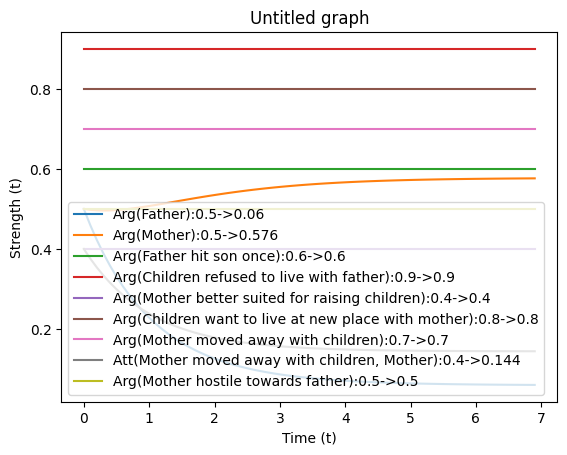

In [17]:
model = grad.semantics.ContinuousDFQuADModel()
model.BAG = BAG

model.approximator = grad.algorithms.RK4(model)
DELTA = 10e-2
EPSILON = 10e-4
result = model.solve(DELTA, EPSILON, True, True)

plot = grad.plotting.strengthplot(model, DELTA, EPSILON)
plot.show()

# Judge 2

In [ ]:
e_mother_illegal = grad.Argument("Mother acted illegally", 0.6)
BAG.add_support(e_mother_illegal, att_mother_move, 0.9)

e_mother_alienation = grad.Argument("Mother alienated children from father", 0.7)
BAG.add_support(e_mother_alienation, att_mother_move, 0.2)
BAG.add_support(e_mother_alienation, att_mother_hostile, 0.8)
BAG.add_attack(e_mother_alienation, sup_mother_child_support, 0.3)
BAG.add_attack(e_mother_alienation, e_father_refuse, 0.4)


Att(Mother alienated children from father, Children refused to live with father):0.4->0.4

ContinuousDFQuADModel, RK4
Time: 5.899999999999995
Arg(Father):0.5->0.132
Arg(Mother):0.5->0.449
Arg(Father hit son once):0.6->0.6
Arg(Children refused to live with father):0.9->0.649
Arg(Mother better suited for raising children):0.4->0.4
Arg(Children want to live at new place with mother):0.8->0.8
Sup(Children want to live at new place with mother, Mother):0.9->0.712
Arg(Mother moved away with children):0.7->0.7
Att(Mother moved away with children, Mother):0.4->0.386
Arg(Mother hostile towards father):0.5->0.5
Att(Mother hostile towards father, Mother):0.5->0.779
Arg(Mother acted illegally):0.6->0.6
Arg(Mother alienated children from father):0.7->0.7



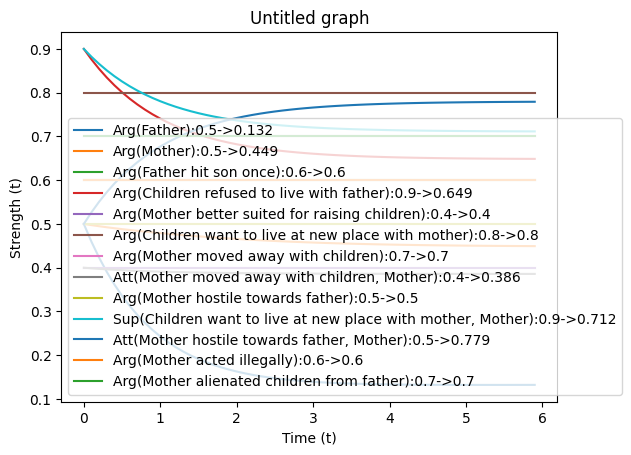

In [19]:
result = model.solve(DELTA, EPSILON, True, True)

plot = grad.plotting.strengthplot(model, DELTA, EPSILON)
plot.show()